# TP 2 Chaînage de points de contours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from skimage import measure
from copy import deepcopy, copy

### Création de l’image binaire de synthèse des points de contours

In [2]:
image=np.zeros((16,16))

In [3]:
# On met à 1 les valeurs des pixels de contour
image[0][10]=1                   
image[1][11]=1
image[2][3:6]=1
image[2][12]=1
image[3][2]=1
image[3][6]=1
image[3][13]=1
image[4][1]=1
image[4][6]=1
image[4][13]=1
image[5][1]=1
image[5][6]=1
image[5][13]=1
image[6][2]=1
image[6][6]=1
image[6][13:15]=1
image[7][3]=1   
image[7][5:7]=1 
image[7][14]=1 
image[8][4]=1
image[8][7]=1
image[8][14:16]=1
image[9][8]=1
image[10][9]=1
image[11][12:16]=1
image[12][6:12]=1
image[13][3:7]=1
image[14][0:3]=1

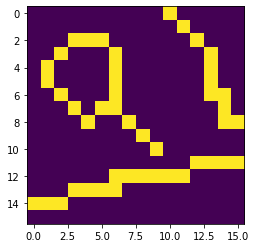

In [4]:
plt.imshow(image)

In [10]:
image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,

## Implantation de l'algorithme parallèle

In [6]:
def algo_parallel(img):
    idx=img.shape[0]
    jdx=img.shape[1]
    chaines=[]
    ident=np.zeros((idx,jdx))
    for i in range(idx):
        for j in range(jdx):
            pointsCP=[]
            if img[i,j]==1:
                if j!=0:
                    if img[i,j-1]==1:
                        pointsCP.append((i,j-1))
                if i!=0:
                    if img[i-1,j]==1:
                        pointsCP.append((i-1,j))
                    if j<jdx-1:                
                        if img[i-1,j+1]==1:
                            pointsCP.append((i-1,j+1))
                    if j!=0:
                        if img[i-1,j-1]==1:
                            pointsCP.append((i-1,j-1))
                        
                #print('pointsCP ({},{})'.format(i,j),pointsCP)
                if len(pointsCP)==0:
                    chaines.append([(i,j)])
                    #print("cas len(pointsCP)==0", len(chaines)," chaines",chaines)
                    ident[i,j]=len(chaines)
                else:
                    if len(pointsCP)==1:
                        id=int(ident[pointsCP[0][0],pointsCP[0][1]])
                        #print("cas len(pointsCP)==1",chaines)
                        #print("id",id)
                        chaines[id-1].append((i,j))
                        #print("cas len(pointsCP)==1", len(chaines)," chaines",chaines)
                        ident[i,j]=id
                        #print(ident)
                    else:
                        #print("cas len(pointsCP)>1")
                        ids=[]
                        for p in pointsCP:
                            ids.append(int(ident[p[0],p[1]]))
                        idmin=min(ids)
                        #print('idmin',idmin)
                        #print(chaines)
                        #print('len(chaines)',len(chaines))
                        for idi in ids:
                            
                            if idi>idmin:
                                #print("Cas fusion")
                                #print('idi',idi)
                                #print(chaines)
                                for pt in chaines[idi-1]:
                                    ident[pt[0],pt[1]]=idmin
                                #print('chaines[idmin-1] avant',chaines[idmin-1])
                                chaines[idmin-1]=chaines[idmin-1]+chaines[idi-1]
                                #print('chaines[idmin-1] aprés',chaines[idmin-1])
                                chaines.pop(idi-1)
                            else :
                                if idi==idmin:
                                    ident[i,j]=idmin
                                    if (i,j) not in chaines[idi-1]:
                                        chaines[idi-1].append((i,j))
                                
                        #print(ident)
    return ident,chaines

In [7]:
imageP,chaines=algo_parallel(image)

####  l’image traitée avec l’algorithme parallèle proposé 

In [8]:
print(imageP)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0.]
 [0. 0. 0. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### La structure des contours (la liste chaînée de listes de points de contours) après avoir traité l’image avec l’algorithme parallèle proposé 

In [9]:
chaines

[[(0, 10),
  (1, 11),
  (2, 12),
  (3, 13),
  (4, 13),
  (5, 13),
  (6, 13),
  (6, 14),
  (7, 14),
  (8, 14),
  (8, 15)],
 [(2, 3),
  (2, 4),
  (2, 5),
  (3, 2),
  (3, 6),
  (4, 1),
  (4, 6),
  (5, 1),
  (5, 6),
  (6, 2),
  (6, 6),
  (7, 3),
  (7, 5),
  (7, 6),
  (8, 4),
  (8, 7),
  (9, 8),
  (10, 9)],
 [(11, 12),
  (11, 13),
  (11, 14),
  (11, 15),
  (12, 6),
  (12, 7),
  (12, 8),
  (12, 9),
  (12, 10),
  (12, 11),
  (13, 3),
  (13, 4),
  (13, 5),
  (13, 6),
  (14, 0),
  (14, 1),
  (14, 2)]]

#### Visualisation de la ségmentaion des contours à travers l’algorithme parallèle proposé :l’image finale des étiquettes (numéros) de contours (càd. les points de contours sont remplacés par le numéro de contour auquel ils appartiennent)

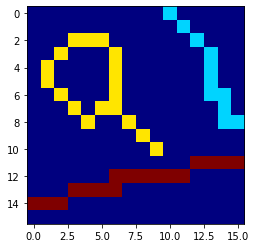

In [11]:
plt.imshow(imageP,cmap='jet')  

#### Implémentation du code freeman

In [12]:
 def encode_freeman(chaine):

        image_copy = copy(chaine)
        freeman_code = ""
        ALLOWED_DIRECTIONS = np.array([0, 45, 90, 135, 180, -45, -90, -135])
        
        for i in range(len(image_copy) - 1):
            delta_x = image_copy[i+1][0] - image_copy[i][0] 
            delta_y = image_copy[i+1][1] - image_copy[i][1]
            angle = math.degrees(math.atan2(delta_y,delta_x))
            idx = (np.abs(ALLOWED_DIRECTIONS-angle)).argmin()
            angle =ALLOWED_DIRECTIONS[idx]
            
            
            if delta_x == 0 and delta_y == 0:
                pass
            elif delta_x > 0 and delta_y == 0:
                freeman_code += '2'
            elif delta_x < 0 and delta_y == 0:
                freeman_code += '6'
            elif delta_x == 0 and delta_y > 0:
                freeman_code += '4'
            elif delta_x == 0 and delta_y < 0:
                freeman_code += '0'
            elif delta_x > 0 and delta_y > 0:
                freeman_code += '3'
            elif delta_x > 0 and delta_y < 0:
                freeman_code += '1'
            elif delta_x < 0 and delta_y > 0:
                freeman_code += '5'
            elif delta_x < 0 and delta_y < 0:
                freeman_code += '7'    
                
        
        return freeman_code

In [30]:
print('FreeMan Code : Contour 1 commencement :(0, 10)','7776660660' ,' Contour 2 commencement (10, 9) :','333222234455677710' ,' Contour 3 commencement (14, 0) :','0010002000001000' )

FreeMan Code : Contour 1 commencement :(0, 10) 7776660660  Contour 2 commencement (10, 9) : 333222234455677710  Contour 3 commencement (14, 0) : 0010002000001000


### Par rapport au codage de l'algorithme parallèle, c'est la partie fusion qui a été un petit peu délicate à coder. En déroulant l'algo à plusieurs reprises et tracer les différentes actions, l'algo a été finalement conçu et a donné les résultats escomptés.

## Objectif du TP

#### L' étape de Chaînage des contours permet de représenter l'image des étiquettes des points de contours. Chaque pixel est affecté à un numéro du contour auquel il appartient, ou de la valeur zéro s'il n'appartient à aucun contour. Par conséquent, tous les pixels d'un même contour apparaissent de la même couleur dans l'image résultante. On peut conclure que cette opération nous permet de faire une ségmentation des points de contours.
#### Le code de Freeman permet de coder un contour chaîné en ne stockant que l’ensemble des déplacements relatifs entre pixels voisins. Pour obtenir le code Freeman nous nous sommes basées sur la liste des chaînes obtenues en appliquant l'algorithme parallèle.